<a href="https://colab.research.google.com/github/Syu1224/Google-Colaborately-Data-Science/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%80%80%E3%83%81%E3%83%BC%E3%83%A0%E5%AF%BE%E6%8A%97%E3%80%80%E5%AE%9F%E5%8A%9B%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 環境の準備
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# 環境の準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
df = pd.read_csv('/content/exercise.csv')

##データの確認

In [ ]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [ ]:
df.shape

(64000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
# recencyの集計可視化
x = df.value_counts('recency')
x

recency
1     8952
10    7565
2     7537
9     6441
3     5904
4     5077
6     4605
5     4510
7     4078
11    3504
8     3495
12    2332
dtype: int64

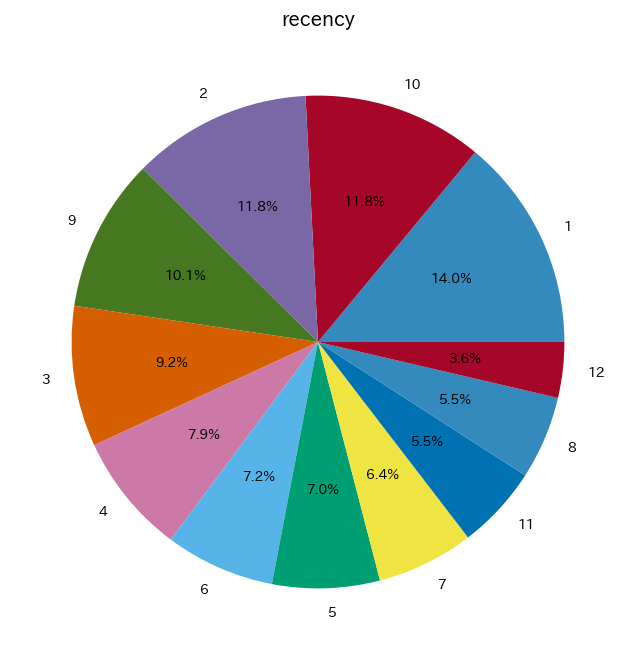

In [ ]:
# recency の円グラフ
plt.title('recency')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# used_discount の集計可視化
x = df.value_counts('used_discount')
x

used_discount
1    35266
0    28734
dtype: int64

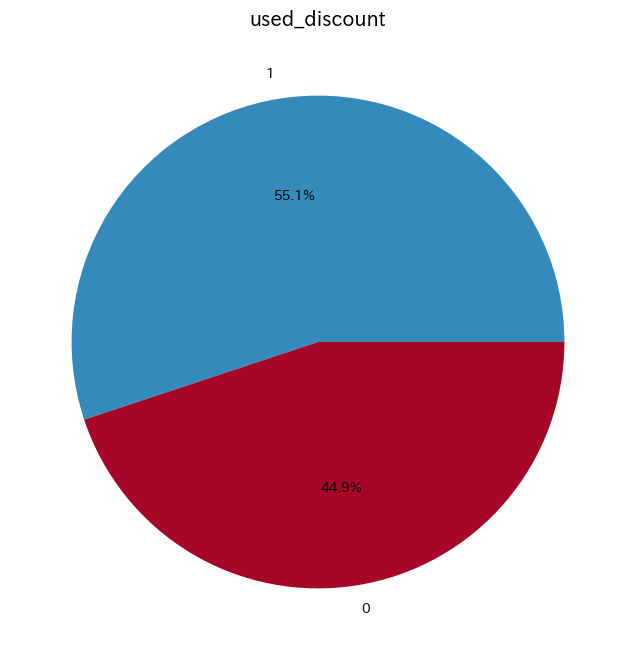

In [ ]:
# used_discount の円グラフ
plt.title('used_discount')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# used_bogo の集計可視化
x = df.value_counts('used_bogo')
x

used_bogo
1    35182
0    28818
dtype: int64

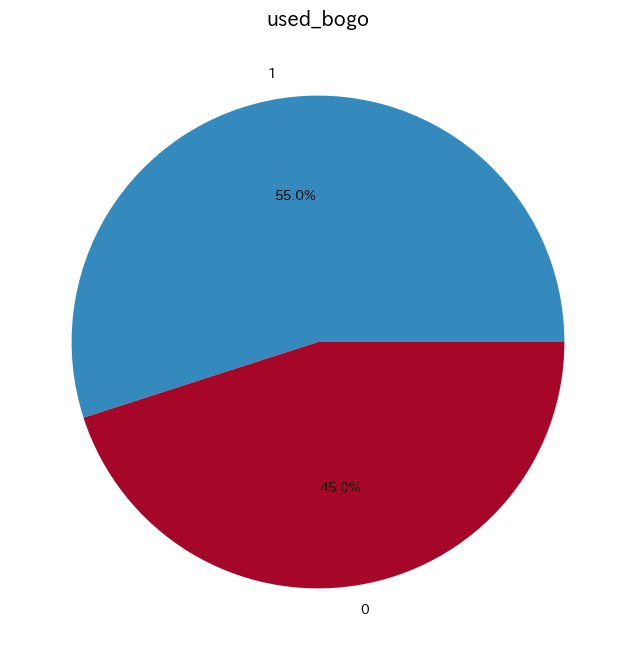

In [ ]:
# used_bogo の円グラフ
plt.title('used_bogo')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# zip_code の集計可視化
x = df.value_counts('zip_code')
x

zip_code
Surburban    28776
Urban        25661
Rural         9563
dtype: int64

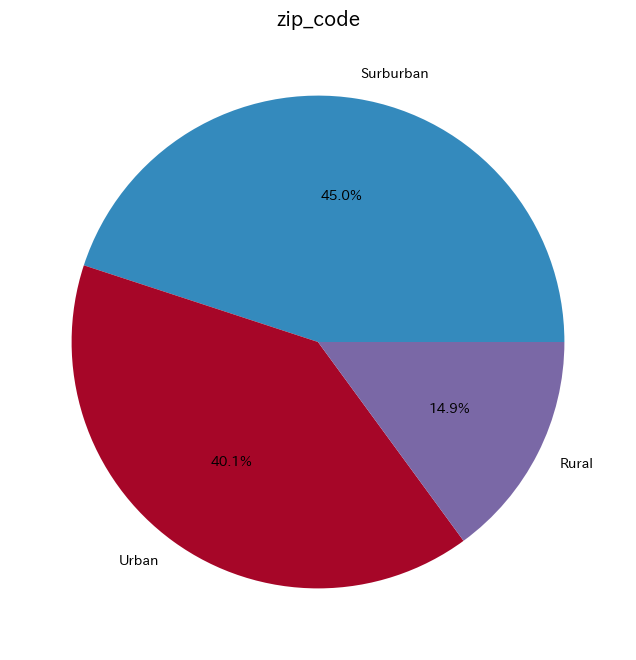

In [ ]:
# zip_code の円グラフ
plt.title('zip_code')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# is_referral の集計可視化
x = df.value_counts('is_referral')
x

is_referral
1    32144
0    31856
dtype: int64

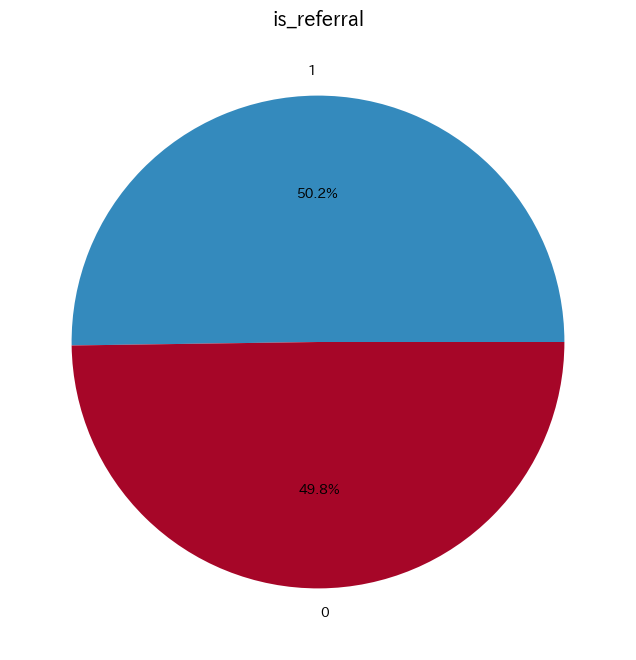

In [ ]:
# is_referral の円グラフ
plt.title('is_referral')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# channel の集計可視化
x = df.value_counts('channel')
x

channel
Web             28217
Phone           28021
Multichannel     7762
dtype: int64

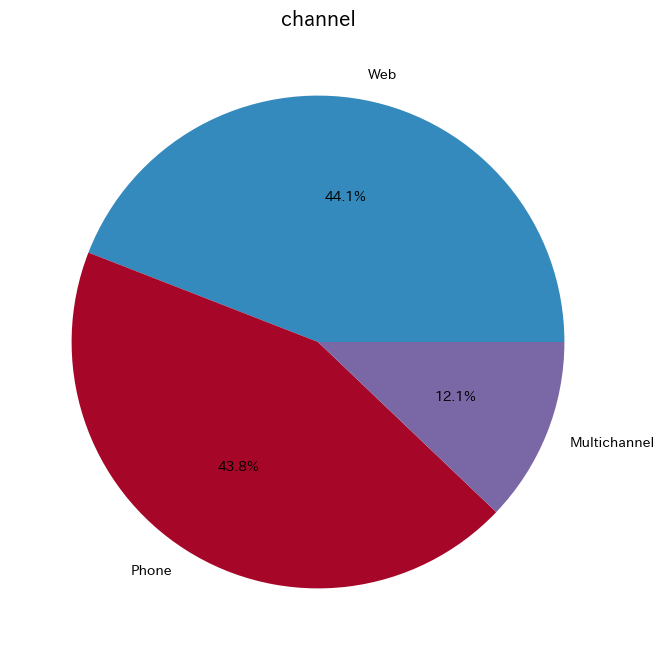

In [ ]:
# channel の円グラフ
plt.title('channel')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# offer の集計可視化
x = df.value_counts('offer')
x

offer
Buy One Get One    21387
Discount           21307
No Offer           21306
dtype: int64

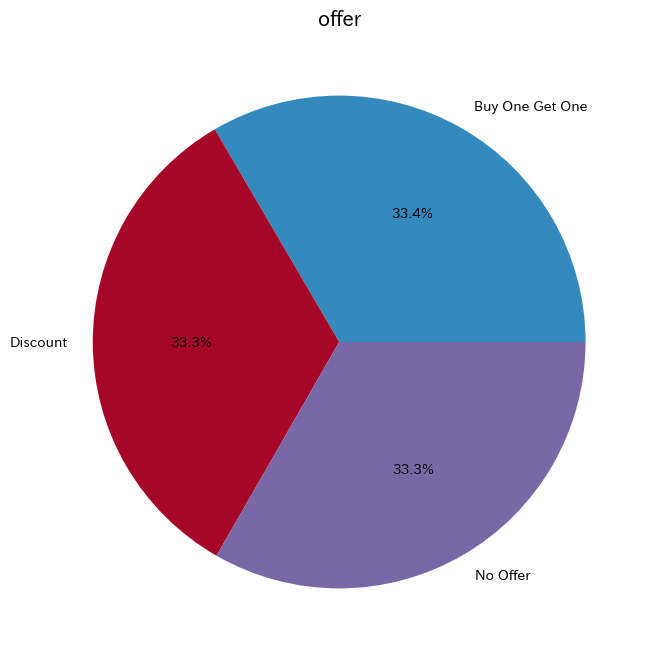

In [ ]:
# offer の円グラフ
plt.title('offer')
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# conversion の集計可視化
x = df.value_counts('conversion')
x

conversion
0    54606
1     9394
dtype: int64

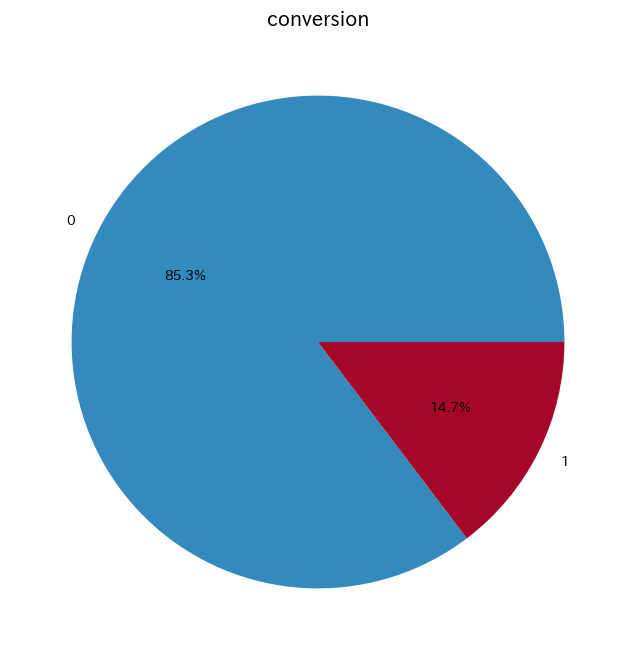

In [ ]:
# conversion の円グラフ
plt.title('conversion')
plt.pie(x, labels=x.index, autopct='%.1f%%');

##基本統計量の確認

In [ ]:
# 代表値の確認
df.describe(include='all')

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


In [ ]:
# conversion でグループ分けした平均値
group = df.groupby('conversion')
group.mean()

,recency,history,used_discount,used_bogo,is_referral
conversion,,,,,
0.0,5.875942,235.550574,0.550536,0.540284,0.517579
1.0,5.075918,284.454952,0.543129,0.624762,0.421769


In [ ]:
# conversion でグループ分けした中央値
group.median()

,recency,history,used_discount,used_bogo,is_referral
conversion,,,,,
0.0,6.0,153.0,1.0,1.0,1.0
1.0,4.0,200.3,1.0,1.0,0.0


In [ ]:
group['recency'].value_counts()

conversion  recency
0.0         1          2845
            10         2615
            2          2396
            9          2276
            3          1933
            4          1658
            5          1586
            6          1506
            7          1344
            11         1236
            8          1187
            12          779
1.0         1           714
            2           528
            3           379
            10          327
            9           295
            4           277
            5           247
            6           244
            7           217
            8           178
            11          156
            12          113
Name: recency, dtype: int64

#データの比較

## データの可視化

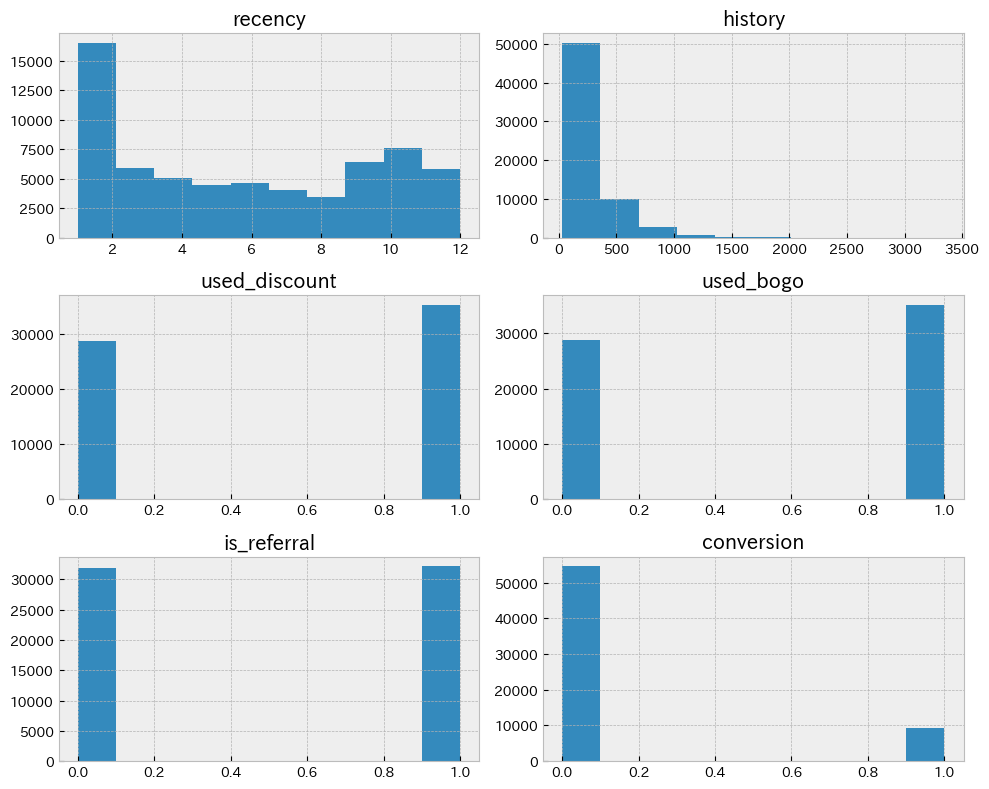

In [ ]:
# ヒストグラム
df.hist();
plt.tight_layout();

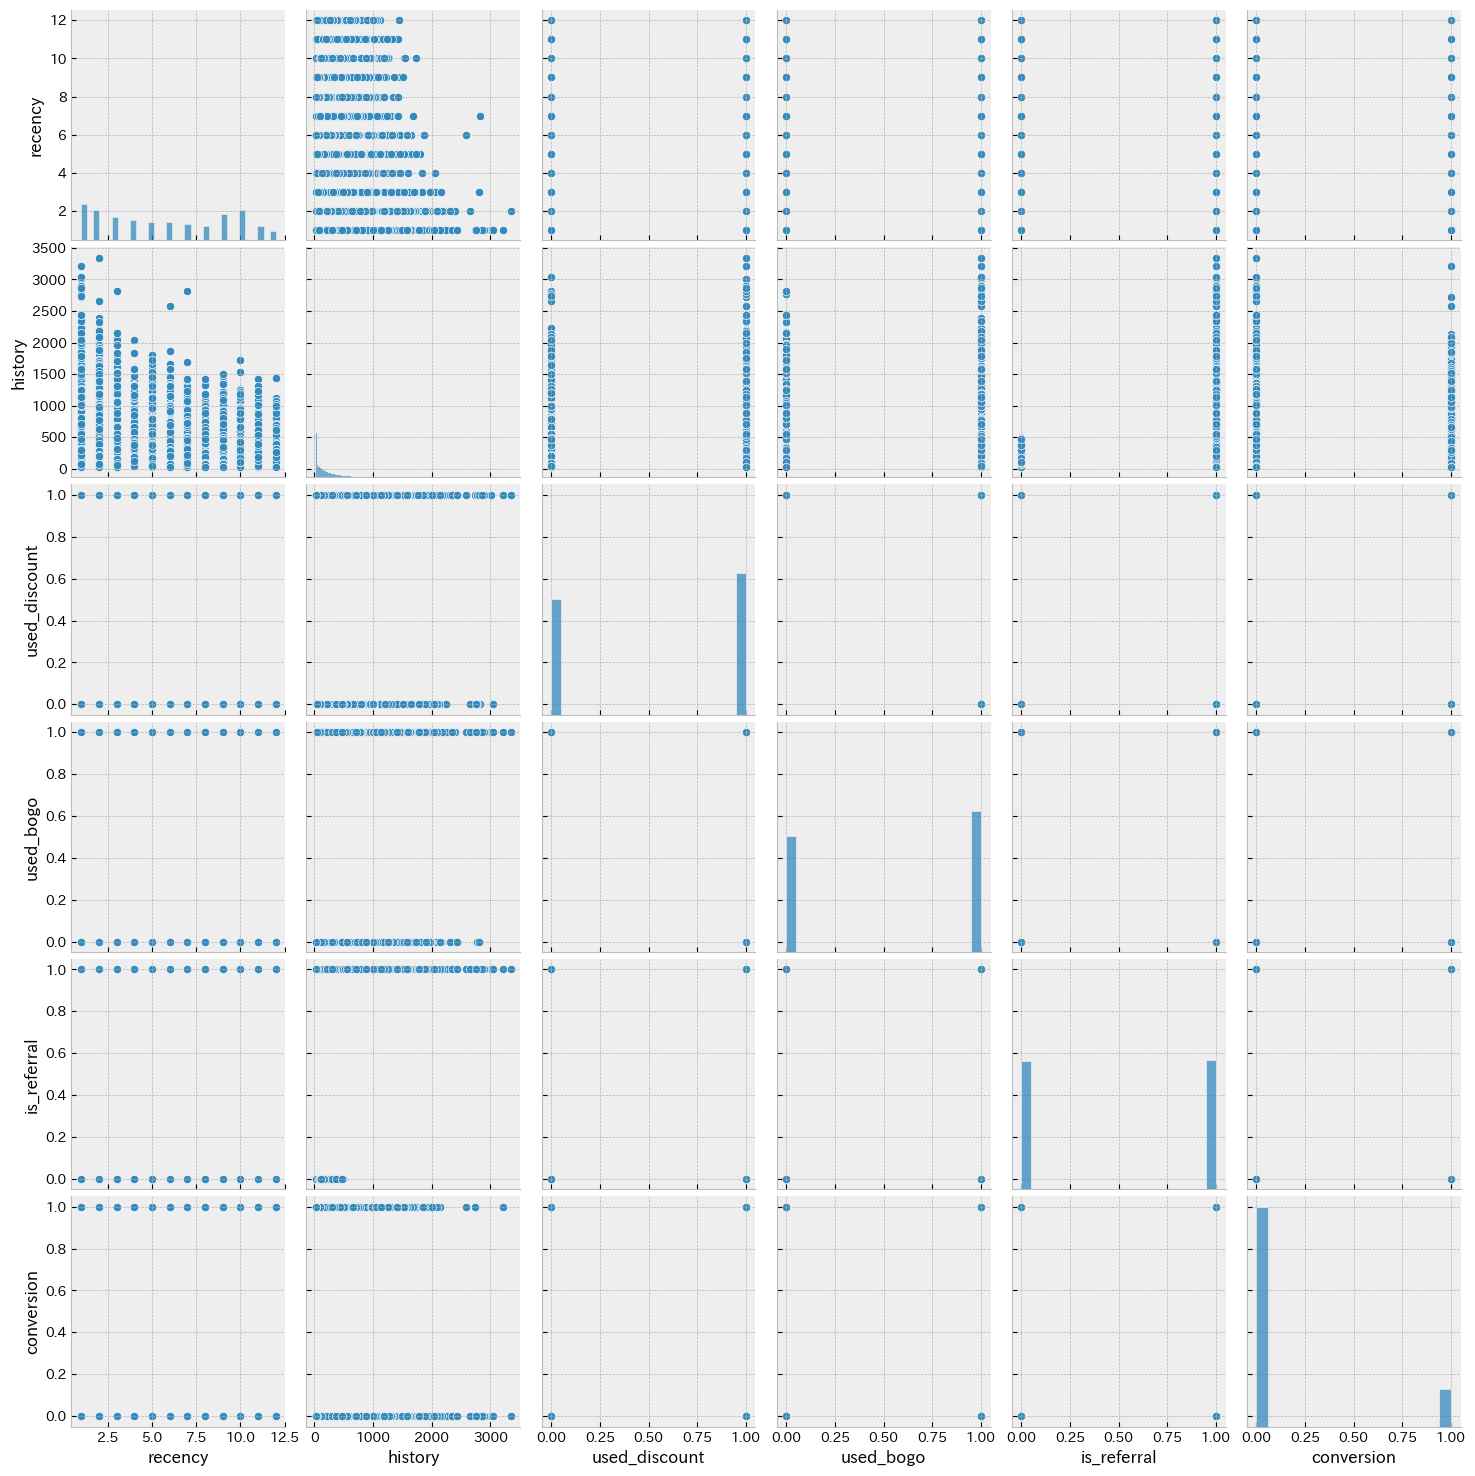

In [ ]:
# 散布図行列
sns.pairplot(df);

## クロス集計

### conversion とその他の変数のクロス集計

In [ ]:
# conversion と history の関係性
pd.crosstab(df['conversion'], df['history'])

history,29.99,30.00,30.01,30.02,30.03,30.05,30.06,30.07,30.08,30.10,...,2765.98,2766.42,2809.79,2816.01,2859.63,2895.11,3003.48,3040.20,3215.97,3345.93
conversion,,,,,,,,,,,,,,,,,,,,,
0,6988,2,4,1,1,2,1,2,4,4,...,1,1,1,1,1,1,1,1,0,1
1,959,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# conversion と recency の関係性
pd.crosstab(df['conversion'], df['recency'])

recency,1,2,3,4,5,6,7,8,9,10,11,12
conversion,,,,,,,,,,,,
0,7224,6197,4922,4321,3868,3957,3532,3048,5707,6713,3081,2036
1,1728,1340,982,756,642,648,546,447,734,852,423,296


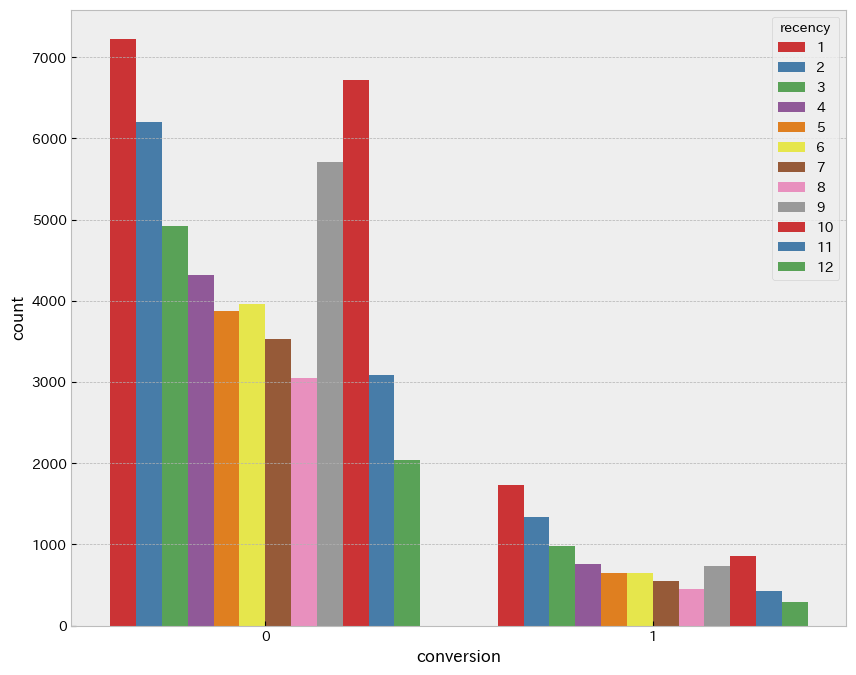

In [ ]:
# conversion と recency の関係性の可視化
sns.countplot(x='conversion', hue='recency', palette='Set1', data=df);

In [ ]:
# conversion と used_discount の関係性
pd.crosstab(df['conversion'], df['used_discount'])

used_discount,0,1
conversion,,
0,24592,30014
1,4142,5252


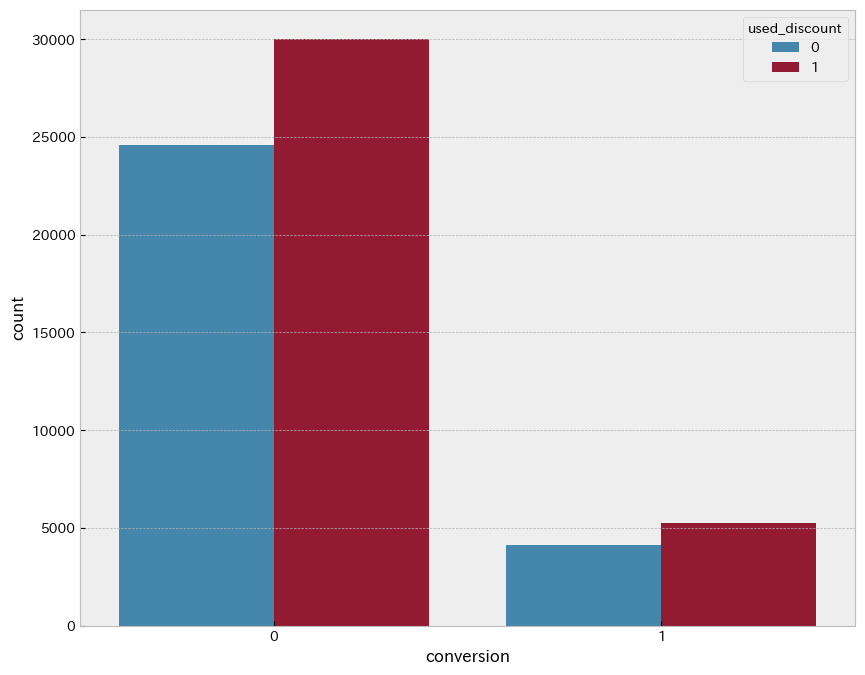

In [ ]:
# conversion と used_discount の関係性の可視化
sns.countplot(x='conversion', hue='used_discount', data=df);

In [ ]:
# conversion と used_bogo の関係性
pd.crosstab(df['conversion'], df['used_bogo'])

used_bogo,0,1
conversion,,
0,25174,29432
1,3644,5750


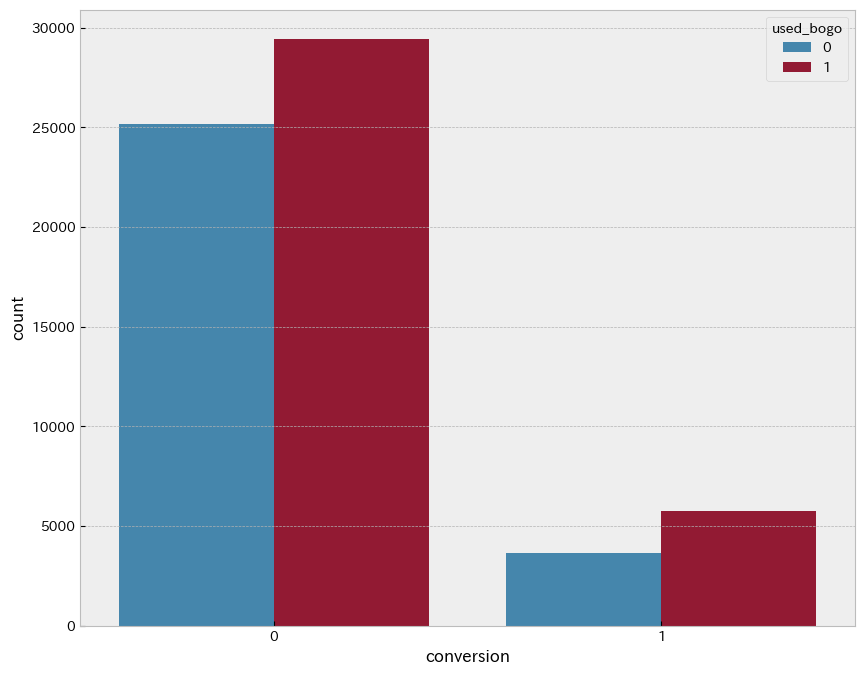

In [ ]:
# conversion と used_bogo の関係性の可視化
sns.countplot(x='conversion', hue='used_bogo', data=df);

In [ ]:
# conversion と zip_code の関係性
pd.crosstab(df['conversion'], df['zip_code'])

zip_code,Rural,Surburban,Urban
conversion,,,
0,7764,24749,22093
1,1799,4027,3568


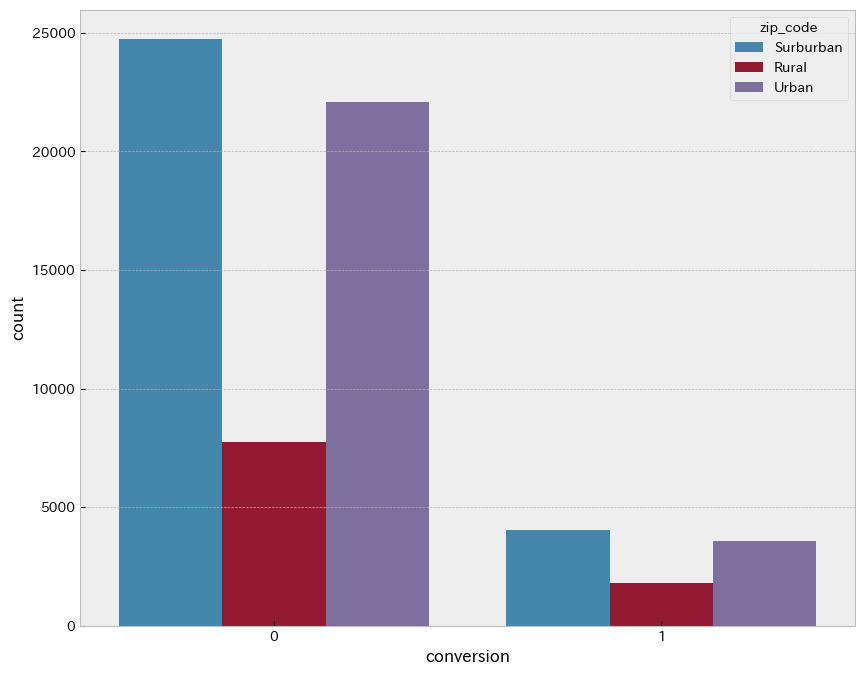

In [ ]:
# conversion と zip_code の関係性の可視化
sns.countplot(x='conversion', hue='zip_code', data=df);

In [ ]:
# conversion と is_referral の関係性
pd.crosstab(df['conversion'], df['is_referral'])

is_referral,0,1
conversion,,
0,26343,28263
1,5513,3881


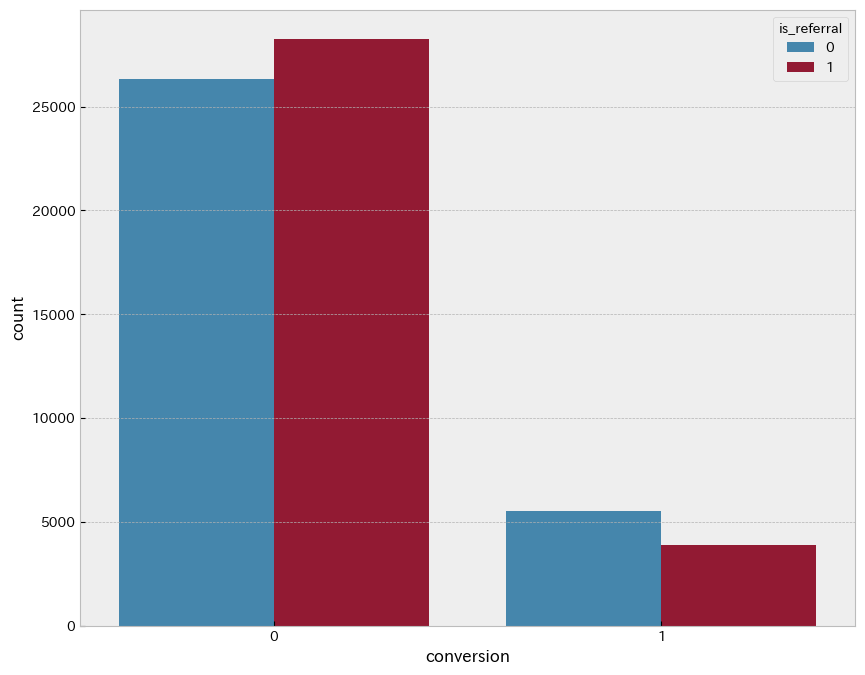

In [ ]:
# conversion と is_referral の関係性の可視化
sns.countplot(x='conversion', hue='is_referral', data=df);

In [ ]:
# conversion と channel の関係性
pd.crosstab(df['conversion'], df['channel'])

channel,Multichannel,Phone,Web
conversion,,,
0,6429,24458,23719
1,1333,3563,4498


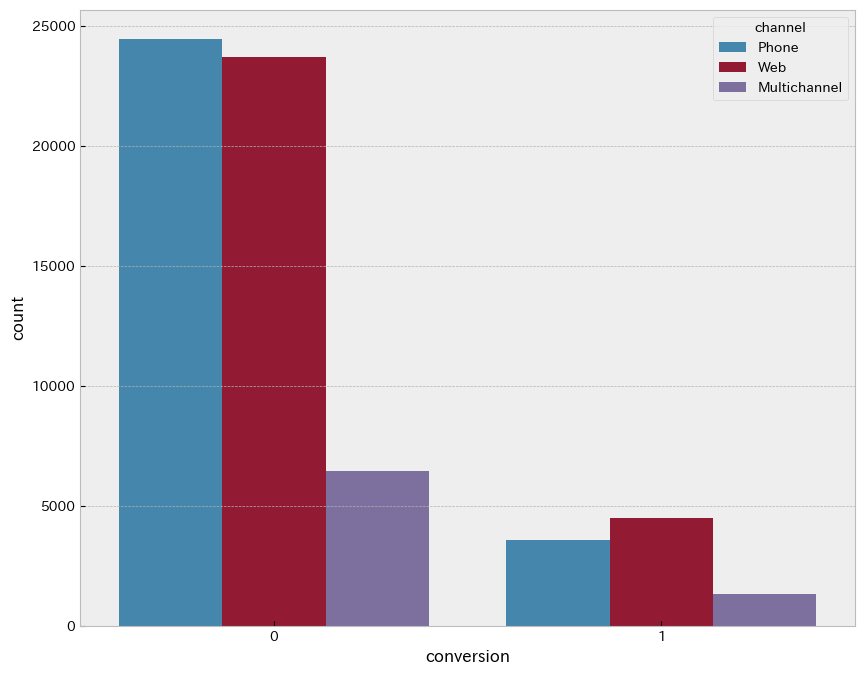

In [ ]:
# conversion と channel の関係性の可視化
sns.countplot(x='conversion', hue='channel', data=df);

In [ ]:
# conversion と offer の関係性
pd.crosstab(df['conversion'], df['offer'])

offer,Buy One Get One,Discount,No Offer
conversion,,,
0,18149,17413,19044
1,3238,3894,2262


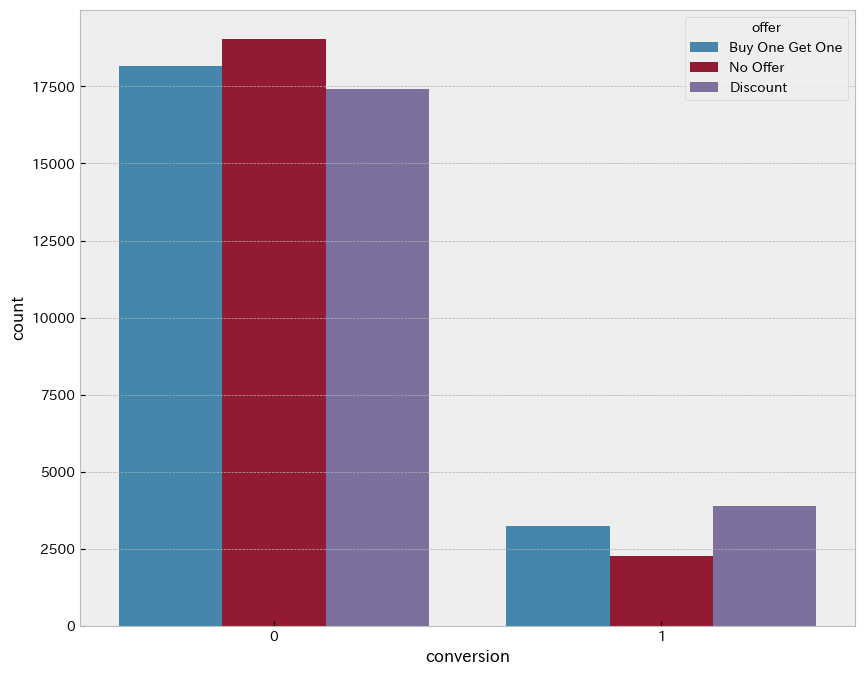

In [ ]:
# conversion と offer の関係性の可視化
sns.countplot(x='conversion', hue='offer', data=df);

In [ ]:
#is_referral,history,recencyだけ抽出
target_columns = ['recency', 'history', 'is_referral']
x = df[target_columns]

In [ ]:
x

,recency,history,is_referral
0,10,142.44,0
1,6,329.08,1
2,7,180.65,1
3,9,675.83,1
4,2,45.34,0
...,...,...,...
63995,10,105.54,0
63996,5,38.91,1
63997,6,29.99,1
63998,1,552.94,1


In [ ]:
xx = x.groupby('recency')
xx['history'].describe()

,count,mean,std,min,25%,50%,75%,max
recency,,,,,,,,
1,8952.0,359.844955,350.504790,29.99,105.8800,252.960,502.0125,3215.97
2,7537.0,310.990777,314.524776,29.99,87.7000,211.390,430.0400,3345.93
3,5904.0,274.462007,273.244529,29.99,78.5650,187.485,371.1075,2809.79
4,5077.0,251.310701,247.867615,29.99,68.8200,172.220,349.9400,2047.64
5,4510.0,233.153233,230.218266,29.99,64.4700,155.865,328.1525,1802.30
6,4605.0,218.387238,219.884675,29.99,60.8800,145.720,302.3800,2583.84
7,4078.0,207.557580,203.493936,29.99,59.9200,143.435,288.1900,2816.01
8,3495.0,194.924066,191.524765,29.99,52.6250,132.920,264.1250,1422.37
9,6441.0,185.874574,179.512854,29.99,53.2700,128.140,256.5700,1507.75


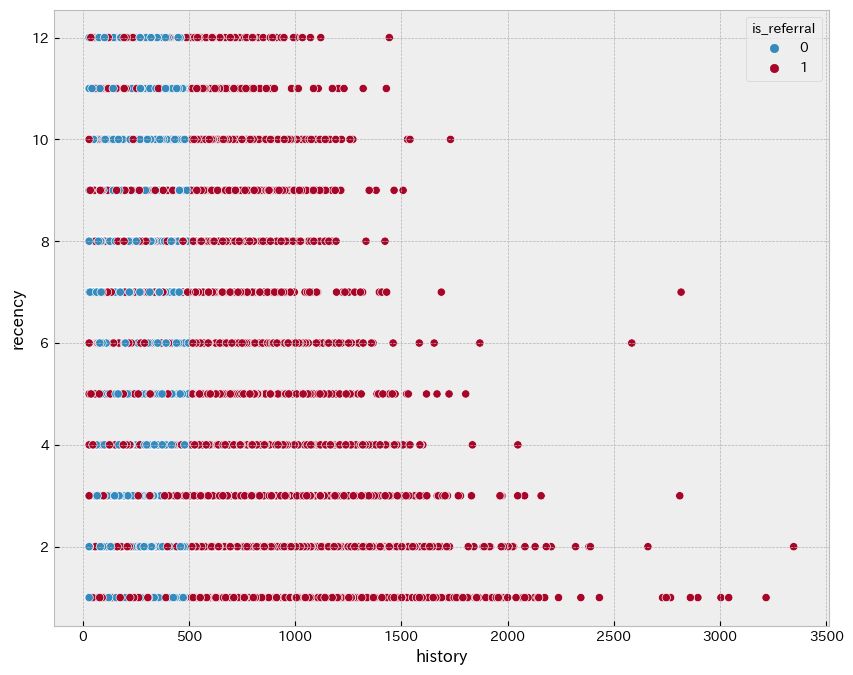

In [ ]:
sns.scatterplot(x='history', y='recency', hue='is_referral', data=x);

##検定

###非リファラル客の方がコンバージョンが多い

    - 帰無仮説 : 2群間は独立
    - 対立仮説 : 2群間は独立ではない
    - 有意水準：5%
    - P値：4.817988877193599e-78 < 0.05
    - 判定：帰無仮説を棄却

In [ ]:
crosstab = pd.crosstab(df['is_referral'], df['conversion'])
crosstab

conversion,0,1
is_referral,,
0,26343,5513
1,28263,3881


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:349.7440987142954
p 値:4.817988877193599e-78
自由度:1


###used_bogoのコンバージョン率が高い

   - 帰無仮説 : 2群間は独立
   - 対立仮説 : 2群間は独立ではない
   - 有意水準：5%
   - P値：1.595298975970467e-39 < 0.05
   - 判定：帰無仮説を棄却

In [ ]:
crosstab = pd.crosstab(df['used_bogo'], df['conversion'])
crosstab

conversion,0,1
used_bogo,,
0,25174,3644
1,29432,5750


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:173.0509512533343
p 値:1.595298975970467e-39
自由度:1


In [ ]:
print(ef)

[[24588.0579375  4229.9420625]
 [30017.9420625  5164.0579375]]


###Web客のコンバージョン率が高い

   - 帰無仮説 : 3群間は独立
   - 対立仮説 : 3群間は独立ではない
   - 有意水準：5%
   - P値：1.2736921440078863e-35 < 0.05
   - 判定：帰無仮説を棄却

In [ ]:
crosstab = pd.crosstab(df['channel'], df['conversion'])
crosstab

conversion,0,1
channel,,
Multichannel,6429,1333
Phone,24458,3563
Web,23719,4498


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:160.69711674409655
p 値:1.2736921440078863e-35
自由度:2


In [ ]:
print(ef)

[[ 6622.6839375   1139.3160625 ]
 [23908.04259375  4112.95740625]
 [24075.27346875  4141.72653125]]


###discountのオファーを送った客のコンバージョン率が高い

   - 帰無仮説 : 3群間は独立
   - 対立仮説 : 3群間は独立ではない
   - 有意水準：5%
   - P値：2.869178384267155e-110 < 0.05
   - 判定：帰無仮説を棄却

In [ ]:
crosstab = pd.crosstab(df['offer'], df['conversion'])
crosstab

conversion,0,1
offer,,
Buy One Get One,18149,3238
Discount,17413,3894
No Offer,19044,2262


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:504.46066903563496
p 値:2.869178384267155e-110
自由度:2


In [ ]:
print(ef)

[[18247.78940625  3139.21059375]
 [18179.53190625  3127.46809375]
 [18178.6786875   3127.3213125 ]]


###コンバージョン客の方が購入額が高い
   - 帰無仮説 : ２群間の平均に差はない
   - 対立仮説 : ２群間の平均に差がある
   - 有意水準：5%
   - P値：2.006166505322324e-70 < 0.05
   - 判定：帰無仮説を棄却

In [ ]:
group = df.groupby('conversion')
group['history'].agg(['mean', 'median'])

,mean,median
conversion,,
0,235.163403,151.835
1,282.323739,202.460


In [ ]:
group1 = group.get_group(0)
group2 = group.get_group(1)

In [ ]:
#コルモゴロフ・スミルノフ検定
stats.kstest(group1['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group2['history'],"norm")
#どちらのグループも正規分布を仮定できない

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
#マンホイットニーのU検定
stats.mannwhitneyu(group1['history'], group2['history'], alternative='two-sided')

MannwhitneyuResult(statistic=227167236.0, pvalue=2.006166505322324e-70)

###コンバージョン客の方がrecencyが低い
   - 帰無仮説 : ２群間の平均に差はない
   - 対立仮説 : ２群間の平均に差がある
   - 有意水準：5%
   - P値：1.3651156524174674e-81 < 0.05
   - 判定：帰無仮説を棄却

In [ ]:
group = df.groupby('conversion')
group['recency'].agg(['mean', 'median'])

,mean,median
conversion,,
0,5.872505,6.0
1,5.131467,4.0


In [ ]:
group1 = group.get_group(0)
group2 = group.get_group(1)

In [ ]:
#コルモゴロフ・スミルノフ検定
stats.kstest(group1['recency'],"norm")

KstestResult(statistic=0.844956713453425, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [ ]:
stats.kstest(group2['recency'],"norm")
#どちらのグループも正規分布を仮定できない

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
#マンホイットニーのU検定
stats.mannwhitneyu(group1['recency'], group2['recency'], alternative='two-sided')

MannwhitneyuResult(statistic=287976211.5, pvalue=1.3651156524174674e-81)

#要因の分析


##相関係数（どの項目がコンバージョンに影響を与えているのかなど）

In [ ]:
# データの数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,0,1,0,1
2,7,180.65,0,1,1,0,1,0,0,1,0,0
3,9,675.83,1,0,1,0,0,0,0,1,1,0
4,2,45.34,1,0,0,0,0,1,0,1,0,0


In [ ]:
# 相関
_df.corr()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
recency,1.000000,-0.252546,-0.028295,-0.031209,-0.053197,-0.080613,0.013063,-0.012589,0.042189,0.026043,0.004189,-0.004067
history,-0.252546,1.000000,0.123690,0.106172,0.226075,0.067671,-0.014446,0.005220,-0.131660,-0.132155,-0.002833,0.001535
used_discount,-0.028295,0.123690,1.000000,-0.814661,0.027078,-0.005268,-0.006479,0.007625,-0.027873,-0.019400,-0.002873,0.007553
used_bogo,-0.031209,0.106172,-0.814661,1.000000,0.022311,0.060128,0.000266,-0.001596,-0.009992,-0.022079,0.001458,-0.004685
is_referral,-0.053197,0.226075,0.027078,0.022311,1.000000,-0.067815,0.001758,0.000607,-0.019585,-0.029168,-0.002647,0.003166
conversion,-0.080613,0.067671,-0.005268,0.060128,-0.067815,1.000000,-0.019470,-0.013857,-0.044630,0.028956,0.067739,-0.082253
zip_code_Surburban,0.013063,-0.014446,-0.006479,0.000266,0.001758,-0.019470,1.000000,-0.739038,-0.004497,0.007741,-0.006868,-0.000401
zip_code_Urban,-0.012589,0.005220,0.007625,-0.001596,0.000607,-0.013857,-0.739038,1.000000,0.004119,-0.009544,0.004330,0.003655
channel_Phone,0.042189,-0.131660,-0.027873,-0.009992,-0.019585,-0.044630,-0.004497,0.004119,1.000000,-0.785615,-0.000332,-0.000579
channel_Web,0.026043,-0.132155,-0.019400,-0.022079,-0.029168,0.028956,0.007741,-0.009544,-0.785615,1.000000,0.001275,0.001527


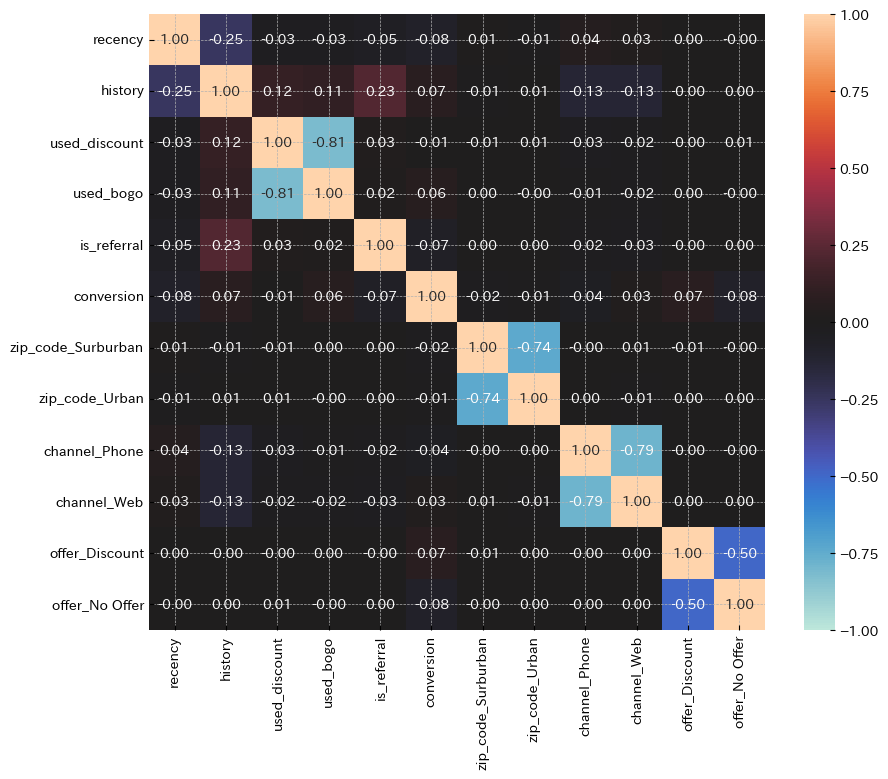

In [ ]:
# 相関の可視化
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

## 重回帰分析（項目全体で見て、どのような影響があるのかなど）

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x = _df.drop('conversion', axis=1)
y = _df['conversion']
x.head(2)

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,1,0,1


In [ ]:
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop('conversion', axis=1).columns)
feature.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,1.106380,-0.818119,1.133138,-0.888008,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.903849,-0.818119,-0.882505,1.126116,-0.706452,1.415574
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,1.106380,-0.818119,-0.882505,1.126116,-0.706452,-0.706427
3,0.922653,1.693278,0.902651,-1.104914,0.99551,-0.903849,-0.818119,-0.882505,1.126116,1.415524,-0.706427
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.903849,1.222316,-0.882505,1.126116,-0.706452,-0.706427


In [ ]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:55:55   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1468      0.001    106.775      0.000       0.144       0.149
recency               -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                0.0145      0.002      8.706      0.000       0.011       0.018
used_discount          0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo              0.0530      0.003     20.703      0.000       0.048       0.058
is_referral           -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Surburban    -0.0232      0.002    -11.367      0.000      -0.027      -0.019
zip_code_Urban        -0.0238      0.002    -11.637      0.000      -0.028      -0.020
channel_Phone         -0.0045      0.002     -1.852      0.064      -0.009       0.000
channel_Web            0.0111      0.002      4.604      0.000       0.006       0.016
offer_Discount         0.0144      0.002      9.070      0.000       0.011       0.017
offer_No Offer        -0.0214      0.002    -13.511      0.000      -0.025      -0.018
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ロジスティック回帰分析

In [ ]:
#ロジスティック回帰分析
import statsmodels.formula.api as smf

In [ ]:
logistic = smf.glm(formula = "conversion ~ recency + history +used_discount + used_bogo + zip_code + is_referral + channel + offer",
                   data = df,
                   family = sm.families.Binomial()).fit()

In [ ]:
print(logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             conversion   No. Observations:                64000
Model:                            GLM   Df Residuals:                    63988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25596.
Date:                Mon, 10 Apr 2023   Deviance:                       51191.
Time:                        06:23:25   Pearson chi2:                 6.32e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03372
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.75

#####ロジスティック回帰分析の結果からも、history, used_bogo, offer の Discount は conversion と正の相関があり、 recency, offer の No Offer は負の相関があることが読み取れる。

## 分類手法を使用した係数比較

### 主成分分析（数値化していないもの）

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)

In [ ]:
# 数値型のデータのみ取得
df_numeric = df.select_dtypes(include='number')
df_numeric.head(3)

,recency,history,used_discount,used_bogo,is_referral,conversion
0,10,142.44,1,0,0,0
1,6,329.08,1,1,1,0
2,7,180.65,0,1,1,0


In [ ]:
# 不要カラムの削除
data = df_numeric.drop(['conversion'], axis=1)
data.head(3)

,recency,history,used_discount,used_bogo,is_referral
0,10,142.44,1,0,0
1,6,329.08,1,1,1
2,7,180.65,0,1,1


In [ ]:
data_scaled = scaler.fit_transform(data)

In [ ]:
#主成分分析の実行
feature = pca.fit_transform(data_scaled)

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.363391
PC2,0.275531
PC3,0.189647
PC4,0.140966
PC5,0.030465


In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=data.columns
)
df_factor_loading

,recency,history,used_discount,used_bogo,is_referral
PC1,0.005216,0.000877,-0.953167,0.953115,0.000426
PC2,-0.619370,0.803828,0.100433,0.102833,0.572067
PC3,0.648151,-0.015876,-0.004920,-0.008777,0.726495
PC4,0.443014,0.589902,0.089907,0.087114,-0.380687
PC5,0.002958,0.075095,-0.270728,-0.270825,-0.006103


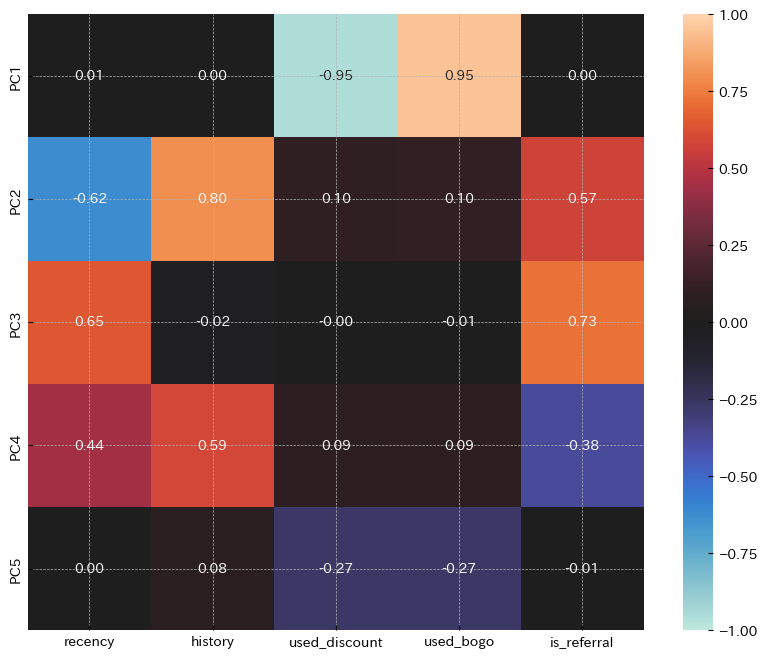

In [ ]:
# 可視化して確認
sns.heatmap(df_factor_loading, vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

### 主成分分析（数値化したもの）

In [ ]:
# 不要カラムの削除
data = _df.drop(['conversion'], axis=1)
data.head(3)

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,1,0,1
2,7,180.65,0,1,1,1,0,0,1,0,0


In [ ]:
data_scaled = scaler.fit_transform(data)

In [ ]:
#主成分分析の実行
feature = pca.fit_transform(data_scaled)

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.165198
PC2,0.162452
PC3,0.157905
PC4,0.136252
PC5,0.127577
PC6,0.086207
PC7,0.065627
PC8,0.045538
PC9,0.023685
PC10,0.015734


In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=data.columns
)
df_factor_loading

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
PC1,-0.006966,0.000808,0.952256,-0.951688,0.000465,-0.044629,0.043531,0.013569,-0.016294,-0.011278,0.013835
PC2,-0.011104,0.007219,-0.024821,0.025764,0.019178,-0.229555,0.230320,0.914685,-0.917687,-0.021155,0.013825
PC3,-0.032153,0.030867,-0.032736,0.043281,0.007106,-0.902160,0.901874,-0.232459,0.222211,0.027842,-0.023325
PC4,0.003741,0.009142,0.013340,-0.010556,0.003357,0.016324,-0.021132,0.021224,-0.021767,0.864952,-0.865228
PC5,-0.607447,0.818876,0.102636,0.105661,0.556534,0.029649,-0.029742,-0.129192,-0.117851,-0.005322,0.004240
PC6,0.641694,-0.015949,-0.005065,-0.008862,0.731927,-0.004565,0.010769,0.005167,0.016395,-0.004082,0.000760
PC7,0.466910,0.560083,0.086317,0.083802,-0.392432,-0.000689,0.000212,-0.099720,-0.108457,-0.004085,0.002902
PC8,-0.001268,0.000107,-0.001293,-0.002633,-0.001286,0.000233,0.001703,-0.001136,0.003185,-0.500458,-0.500441
PC9,0.001494,0.001726,-0.001853,-0.001429,0.001616,-0.360908,-0.360872,0.004585,0.004362,-0.001701,0.000327
PC10,0.004211,0.100607,-0.017678,-0.018424,-0.010267,0.003652,0.004023,0.284905,0.284566,0.000283,0.001077


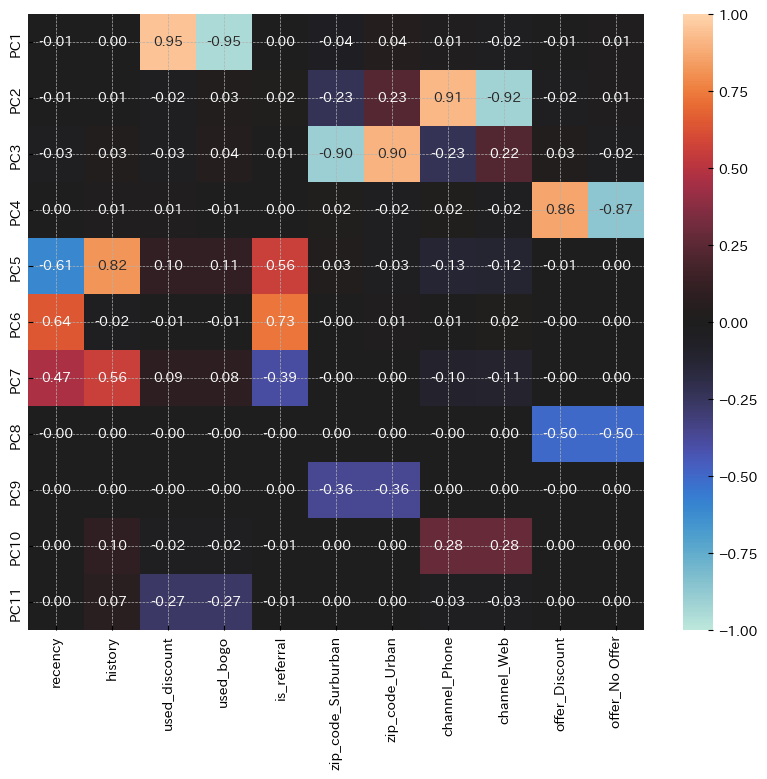

In [ ]:
# 可視化して確認
sns.heatmap(df_factor_loading, vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

### クラスタリング

#### 数値データのみ クラスタ4

In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(2)

,recency,history,used_discount,used_bogo,is_referral,conversion
0,10,142.44,1,0,0,0
1,6,329.08,1,1,1,0


In [ ]:
_df = df_numeric.drop(['conversion'], axis=1)
_df.head(2)

,recency,history,used_discount,used_bogo,is_referral
0,10,142.44,1,0,0
1,6,329.08,1,1,1


In [ ]:
# 標準化の実行
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 1.20775141, -0.38900287,  0.90265115, -1.10491366, -1.00451017])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []

for i  in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

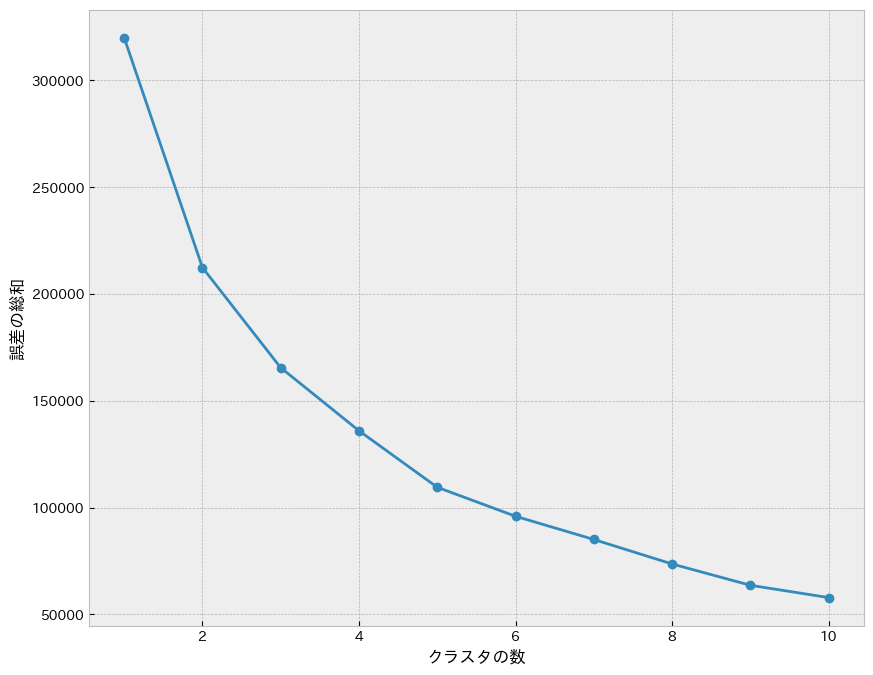

In [ ]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[3 2 0 ... 2 1 0]


In [ ]:
new_df = df.copy()

In [ ]:
new_df['cluster'] = cluster

In [ ]:
new_df.head(2)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,cluster
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,3
1,6,329.08,1,1,Rural,1,Web,No Offer,0,2


In [ ]:
groups = new_df.groupby('cluster')
groups.size()

cluster
0    26380
1     7151
2    13248
3    17221
dtype: int64

In [ ]:
groups.agg(['min', 'max', 'mean', 'median'])

recency                      history                                \
            min max      mean median     min      max        mean   median   
cluster                                                                      
0             1  12  6.134837    6.0   29.99   667.21  159.002796  120.820   
1             1  12  3.294924    2.0  233.99  3345.93  792.019111  716.930   
2             1  12  6.178970    6.0   29.99   791.87  171.774851  119.775   
3             1  12  5.900993    6.0   29.99   499.91  195.086599  172.190   

        used_discount      ... used_bogo        is_referral                \
                  min max  ...      mean median         min max      mean   
cluster                    ...                                              
0                   0   0  ...  1.000000    1.0           0   1  0.445224   
1                   0   1  ...  0.766326    1.0           1   1  1.000000   
2                   1   1  ...  0.059254    0.0           1   1  1.000000   
3                   1   1  ...  0.147320    0.0           0   0  0.000000   

               conversion                       
        median        min max      mean median  
cluster                                         
0          0.0          0   1  0.142798    0.0  
1          1.0          0   1  0.199413    0.0  
2          1.0          0   1  0.094052    0.0  
3          0.0          0   1  0.171593    0.0  

[4 rows x 24 columns]

In [ ]:
groups.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
cluster,,,,,,
0,6.134837,159.002796,0.000000,1.000000,0.445224,0.142798
1,3.294924,792.019111,0.670815,0.766326,1.000000,0.199413
2,6.178970,171.774851,1.000000,0.059254,1.000000,0.094052
3,5.900993,195.086599,1.000000,0.147320,0.000000,0.171593


In [ ]:
mean = groups.mean()

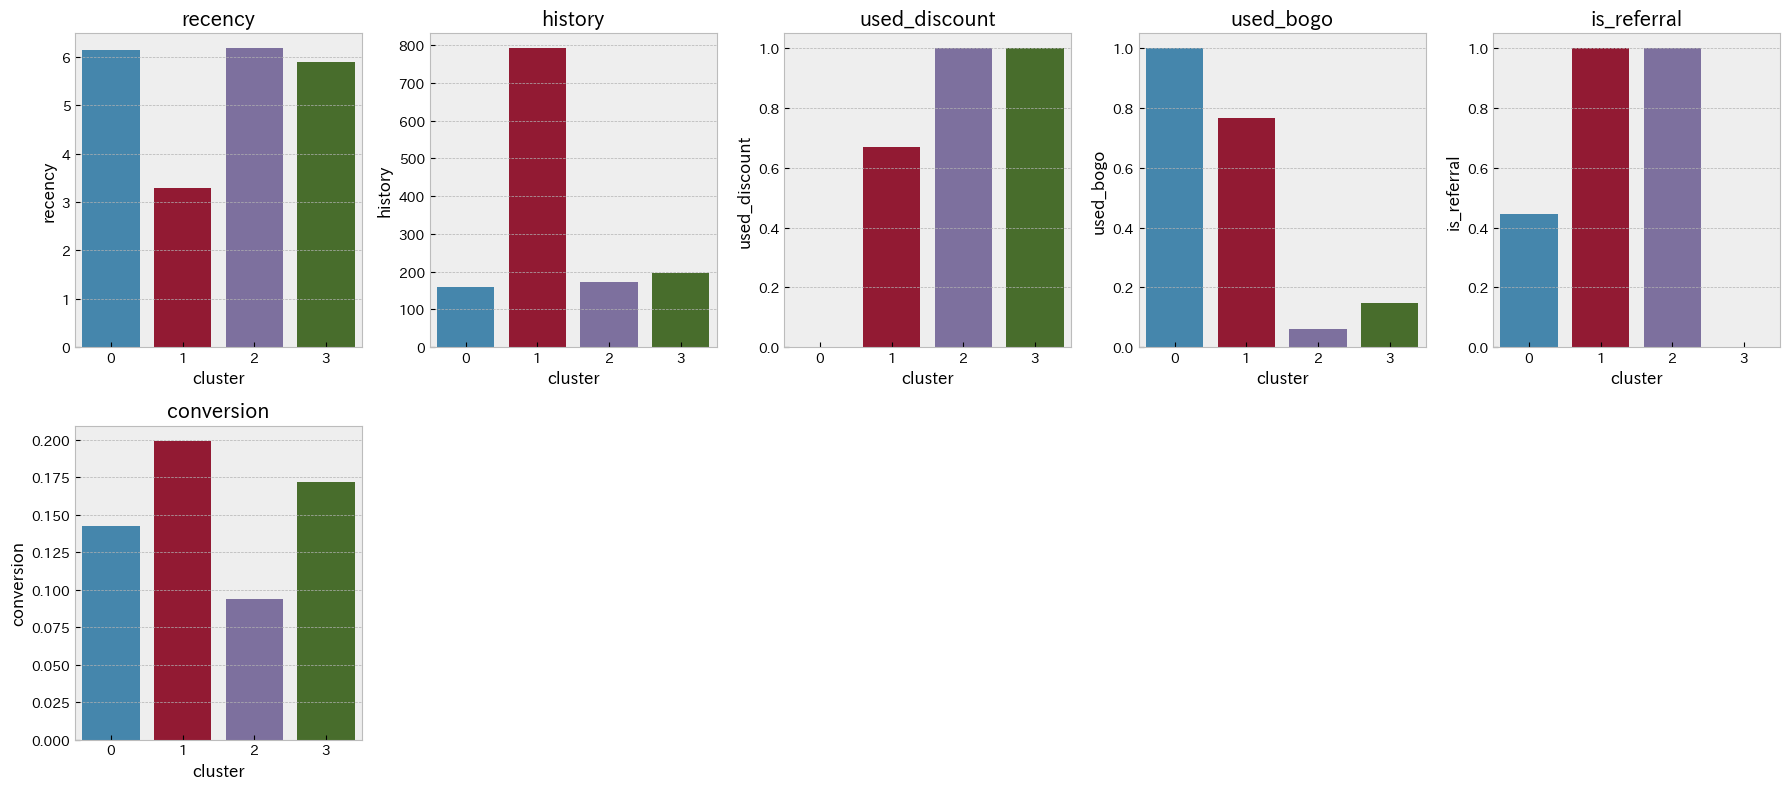

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

#### 数値データのみ クラスタ5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[4 2 2 ... 3 0 1]


In [ ]:
new_df = df.copy()

In [ ]:
new_df['cluster'] = cluster

In [ ]:
new_df.head(2)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,cluster
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,4
1,6,329.08,1,1,Rural,1,Web,No Offer,0,2


In [ ]:
groups = new_df.groupby('cluster')
groups.size()

cluster
0     6547
1    14635
2    13260
3    12337
4    17221
dtype: int64

In [ ]:
groups.agg(['min', 'max', 'mean', 'median'])

recency                      history                               \
            min max      mean median     min      max        mean  median   
cluster                                                                     
0             1  12  3.212158    2.0  250.58  3345.93  816.770947  740.75   
1             1  12  6.001845    6.0   29.99   499.95  172.332879  139.99   
2             1  12  6.218854    6.0   29.99   800.37  171.323143  122.43   
3             1  12  6.154576    6.0   29.99   752.37  161.518984  108.59   
4             1  12  5.900993    6.0   29.99   499.91  195.086599  172.19   

        used_discount      ... used_bogo        is_referral                  \
                  min max  ...      mean median         min max mean median   
cluster                    ...                                                
0                   0   1  ...  0.725523    1.0           1   1  1.0    1.0   
1                   0   0  ...  1.000000    1.0           0   0  0.0    0.0   
2                   0   1  ...  1.000000    1.0           1   1  1.0    1.0   
3                   1   1  ...  0.000000    0.0           1   1  1.0    1.0   
4                   1   1  ...  0.147320    0.0           0   0  0.0    0.0   

        conversion                       
               min max      mean median  
cluster                                  
0                0   1  0.200092    0.0  
1                0   1  0.174786    0.0  
2                0   1  0.112293    0.0  
3                0   1  0.087704    0.0  
4                0   1  0.171593    0.0  

[5 rows x 24 columns]

In [ ]:
groups.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
cluster,,,,,,
0,3.212158,816.770947,0.741256,0.725523,1.0,0.200092
1,6.001845,172.332879,0.000000,1.000000,0.0,0.174786
2,6.218854,171.323143,0.064480,1.000000,1.0,0.112293
3,6.154576,161.518984,1.000000,0.000000,1.0,0.087704
4,5.900993,195.086599,1.000000,0.147320,0.0,0.171593


In [ ]:
mean = groups.mean()

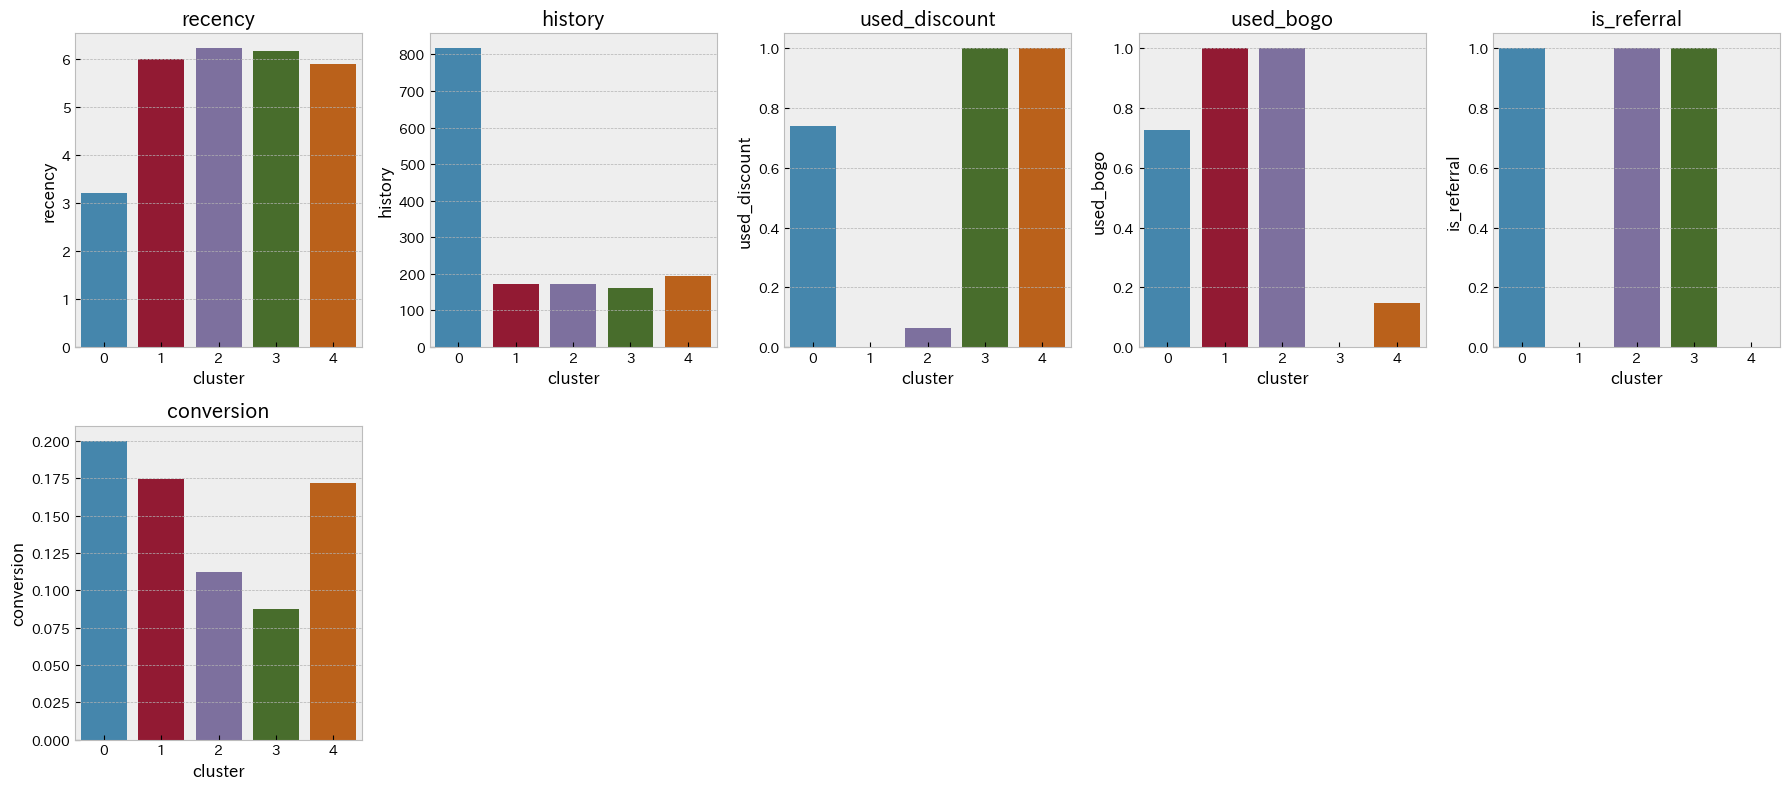

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

#### 全変数を数値化したクラスタリング クラスタ5

In [ ]:
# データの数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,0,1,0,1
2,7,180.65,0,1,1,0,1,0,0,1,0,0
3,9,675.83,1,0,1,0,0,0,0,1,1,0
4,2,45.34,1,0,0,0,0,1,0,1,0,0


In [ ]:
x = _df.drop(['conversion'], axis=1)

In [ ]:
# 標準化の実行
x_scaled = scaler.fit_transform(x)
x_scaled[0]

array([ 1.20775141, -0.38900287,  0.90265115, -1.10491366, -1.00451017,
        1.10637951, -0.81811885,  1.1331378 , -0.88800834, -0.70645226,
       -0.7064274 ])

In [ ]:
sse = []

for i  in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

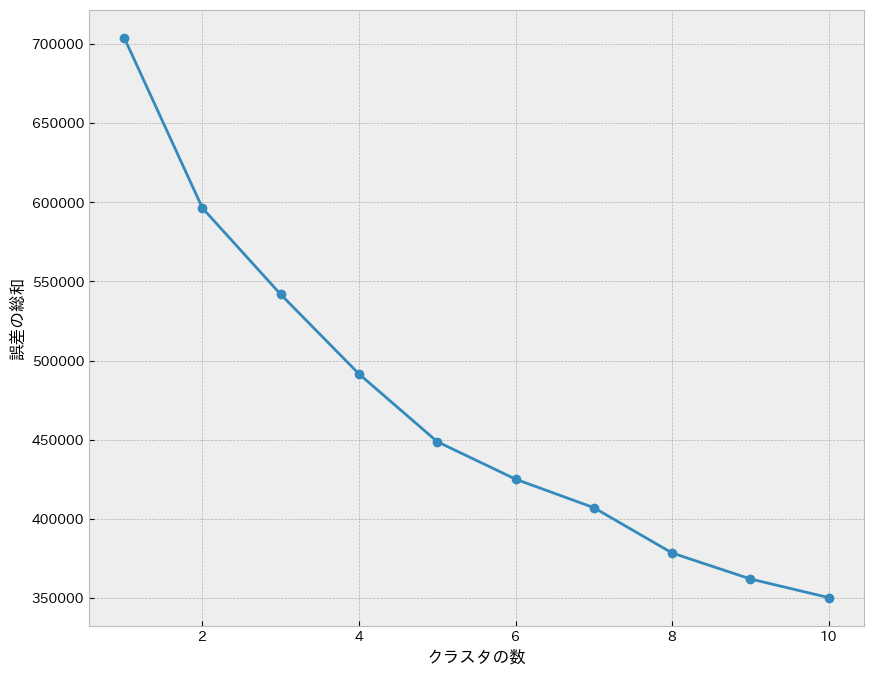

In [ ]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[1 2 4 ... 1 3 4]


In [ ]:
new_df = _df.copy()

In [ ]:
new_df['cluster'] = cluster

In [ ]:
groups = new_df.groupby('cluster')
groups.size()

cluster
0    14672
1    12530
2    15929
3     7471
4    13398
dtype: int64

In [ ]:
mean = groups.mean()

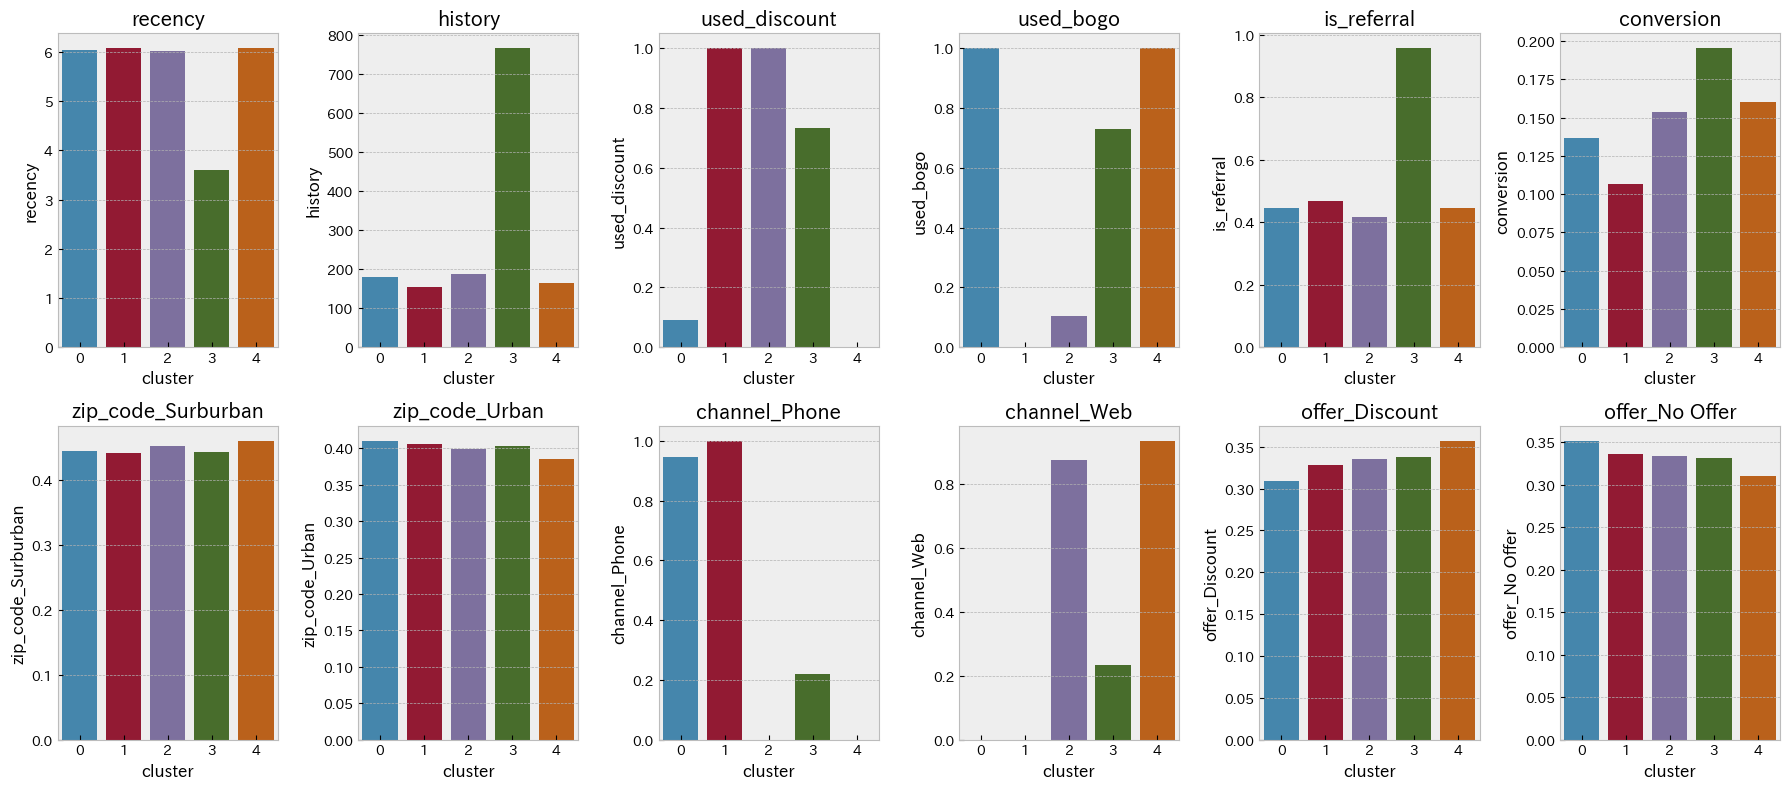

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 6, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

#### 全変数を数値化したクラスタリング クラスタ7

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[2 1 1 ... 2 0 3]


In [ ]:
new_df = _df.copy()

In [ ]:
new_df['cluster'] = cluster

In [ ]:
groups = new_df.groupby('cluster')
groups.size()

cluster
0     5953
1     6776
2    14143
3     5858
4     8527
5    10223
6    12520
dtype: int64

In [ ]:
mean = groups.mean()

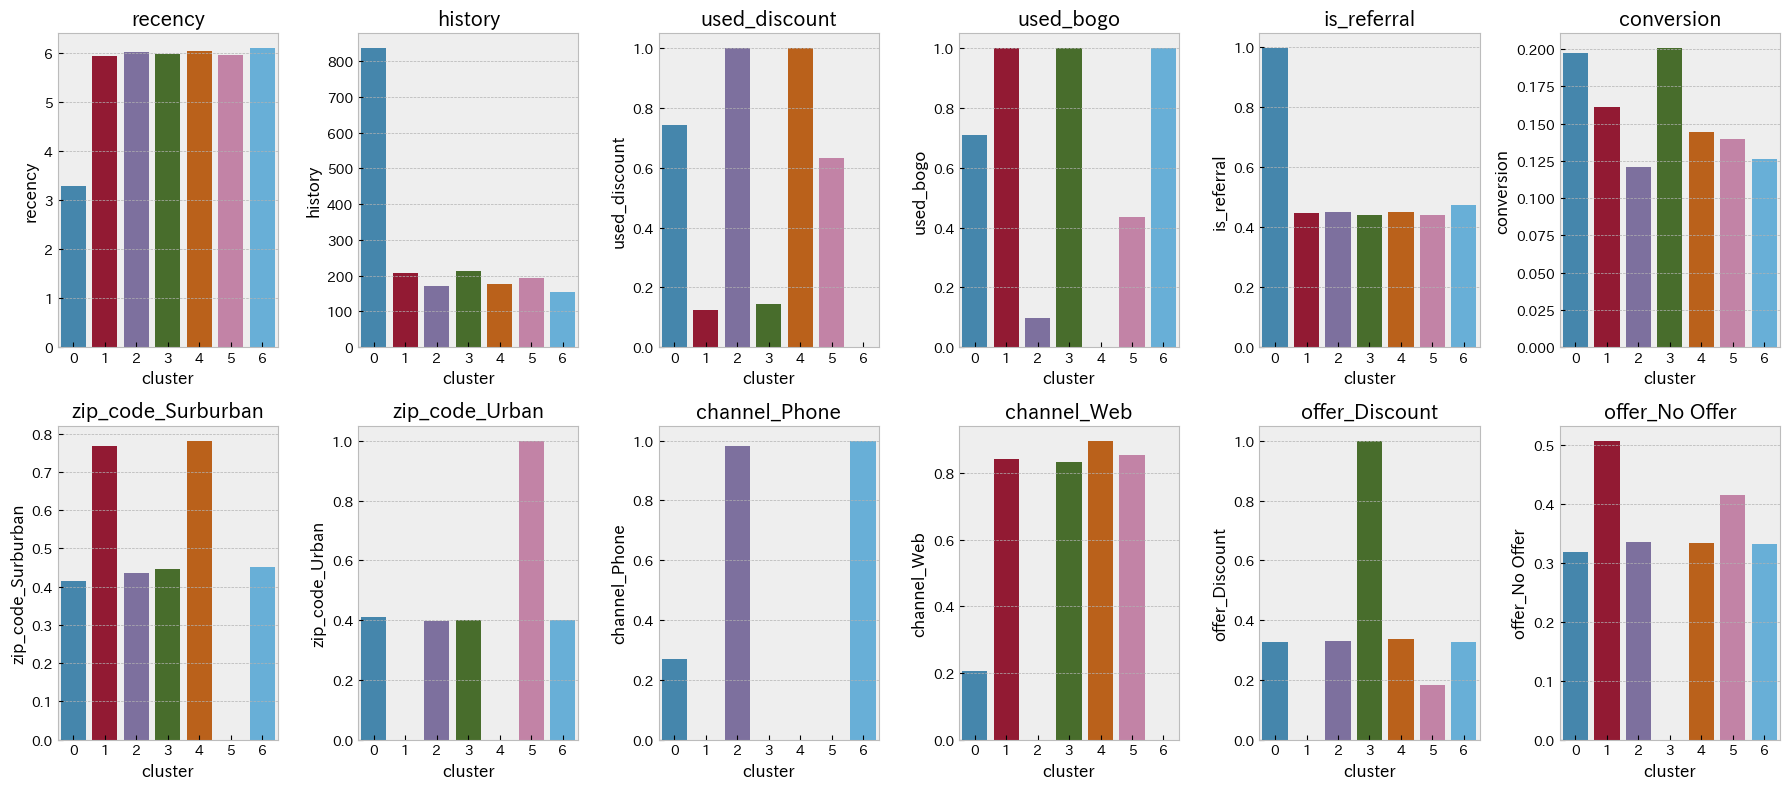

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 6, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

## 結論

データ分析の結論として以下の実施を提案する。  

- 最近購入している顧客や、購入総額の大きい顧客を中心にオファーを送る。
- bogoを使っていない顧客にはbogoのオファーを送り、bogoを使ったことのある顧客にはdiscountのオファーを送る。
- キャンペーンなどを実施し、招待客を増やす。